## Metaprofiles across gene body and adjacent regions

This notebook was used to prepare dataframes and plot parts of Figure 4.
Vakil Takhaveev and Jasmina Kubitschek, 2024

In [1]:
#importing necessary modules
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sys
import math
import pyfaidx
from pyfaidx import Fasta

print(sys.version)

from itertools import product

3.11.6 (main, Jun  7 2024, 07:09:59) [GCC 13.2.0]


In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['mathtext.default'] = "regular"

matplotlib.rcParams['font.size'] = 16

In [3]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("scipy", scipy.__version__)
print("pyfaidx", pyfaidx.__version__)


numpy 1.26.4
pandas 2.2.2
matplotlib 3.9.0
seaborn 0.13.2
scipy 1.13.1
pyfaidx 0.8.1.2


In [4]:
# path to gene annotation folder
input_path = '/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/O6meG_revision/gene_annotation/'

In [5]:
# folder paths for output
path = '/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/O6meG_revision/Plotting/'
data_path = path + 'Source_data/gene_annotated_data/'
graph_path = path + 'Graphs/'

In [6]:
lookup = pd.read_csv(path + 'sample_lookup.csv',index_col=0)
lookup

sample_ID cell_type  TMZ_conc exposures replicate  \
seq_ID                                                                
1              01_WT_1mM_3x        WT       1mM        3x      rep1   
2            02_MGMT_1mM_3x      MGMT       1mM        3x      rep1   
3            03_WT_100uM_3x        WT     100uM        3x      rep1   
4          04_MGMT_100mM_3x      MGMT     100uM        3x      rep1   
5              05_WT_1mM_1x        WT       1mM        1x      rep1   
6            06_MGMT_1mM_1x      MGMT       1mM        1x      rep1   
7            07_WT_100uM_1x        WT     100uM        1x      rep1   
8          08_MGMT_100mM_1x      MGMT     100uM        1x      rep1   
9             09_WT_DMSO_1x        WT  DMSOctrl        1x      rep1   
10          10_MGMT_DMSO_1x      MGMT  DMSOctrl        1x      rep1   
11        17_WT_1mMnaked_1x        WT  1mMnaked        1x      rep1   
12      18_MGMT_1mMnaked_1x      MGMT  1mMnaked        1x      rep1   
13             21_WT_1mM_3x        WT       1mM        3x      rep2   
14           22_MGMT_1mM_3x      MGMT       1mM        3x      rep2   
15           23_WT_100uM_3x        WT     100uM        3x      rep2   
16         24_MGMT_100mM_3x      MGMT     100uM        3x      rep2   
17             25_WT_1mM_1x        WT       1mM        1x      rep2   
18           26_MGMT_1mM_1x      MGMT       1mM        1x      rep2   
19           27_WT_100uM_1x        WT     100uM        1x      rep2   
20         88_MGMT_100mM_1x      MGMT     100uM        1x      rep2   
21            29_WT_DMSO_1x        WT  DMSOctrl        1x      rep2   
22          30_MGMT_DMSO_1x      MGMT  DMSOctrl        1x      rep2   
23        37_WT_1mMnaked_1x        WT  1mMnaked        1x      rep2   
24      38_MGMT_1mMnaked_1x      MGMT  1mMnaked        1x      rep2   
25             41_WT_1mM_3x        WT       1mM        3x      rep3   
26           42_MGMT_1mM_3x      MGMT       1mM        3x      rep3   
27           43_WT_100uM_3x        WT     100uM        3x      rep3   
28         44_MGMT_100mM_3x      MGMT     100uM        3x      rep3   
29             45_WT_1mM_1x        WT       1mM        1x      rep3   
30           46_MGMT_1mM_1x      MGMT       1mM        1x      rep3   
31           47_WT_100uM_1x        WT     100uM        1x      rep3   
32         48_MGMT_100mM_1x      MGMT     100uM        1x      rep3   
33            49_WT_DMSO_1x        WT  DMSOctrl        1x      rep3   
34          50_MGMT_DMSO_1x      MGMT  DMSOctrl        1x      rep3   
35        57_WT_1mMnaked_1x        WT  1mMnaked        1x      rep3   
36      58_MGMT_1mMnaked_1x      MGMT  1mMnaked        1x      rep3   
37           T1_repair_test        WT  1mMnaked        1x      rep1   
38         T2_NOrepair_test        WT  1mMnaked        1x      rep2   

               condition                 sample             processed_file  \
seq_ID                                                                       
1              WT_1mM_3x         WT_1mM_3x_rep1         WT_1mM_3x_rep1.tsv   
2            MGMT_1mM_3x       MGMT_1mM_3x_rep1       MGMT_1mM_3x_rep1.tsv   
3            WT_100uM_3x       WT_100uM_3x_rep1       WT_100uM_3x_rep1.tsv   
4          MGMT_100uM_3x     MGMT_100uM_3x_rep1     MGMT_100uM_3x_rep1.tsv   
5              WT_1mM_1x         WT_1mM_1x_rep1         WT_1mM_1x_rep1.tsv   
6            MGMT_1mM_1x       MGMT_1mM_1x_rep1       MGMT_1mM_1x_rep1.tsv   
7            WT_100uM_1x       WT_100uM_1x_rep1       WT_100uM_1x_rep1.tsv   
8          MGMT_100uM_1x     MGMT_100uM_1x_rep1     MGMT_100uM_1x_rep1.tsv   
9         WT_DMSOctrl_1x    WT_DMSOctrl_1x_rep1    WT_DMSOctrl_1x_rep1.tsv   
10      MGMT_DMSOctrl_1x  MGMT_DMSOctrl_1x_rep1  MGMT_DMSOctrl_1x_rep1.tsv   
11        WT_1mMnaked_1x    WT_1mMnaked_1x_rep1    WT_1mMnaked_1x_rep1.tsv   
12      MGMT_1mMnaked_1x  MGMT_1mMnaked_1x_rep1  MGMT_1mMnaked_1x_rep1.tsv   
13             WT_1mM_3x         WT_1mM_3x_rep2         WT_1mM_3x_rep2.tsv   
14     

### Assembling the damage dataframe

In [7]:
avg_median_table = pd.read_csv(data_path + "sample_averages_medians_prot_coding_genes.csv", index_col =0)
avg_median_table

Sample  damage_average  damage_median  \
0          WT_1mM_3x_rep1       18.523695            5.0   
1        MGMT_1mM_3x_rep1        5.266667            1.0   
2        WT_100uM_3x_rep1        1.987149            0.0   
3      MGMT_100uM_3x_rep1        1.698795            0.0   
4          WT_1mM_1x_rep1        3.751406            1.0   
5        MGMT_1mM_1x_rep1        3.448193            1.0   
6        WT_100uM_1x_rep1        3.602008            1.0   
7      MGMT_100uM_1x_rep1        3.248996            1.0   
8     WT_DMSOctrl_1x_rep1        2.700000            1.0   
9   MGMT_DMSOctrl_1x_rep1        2.602008            0.0   
10    WT_1mMnaked_1x_rep1        8.948594            2.0   
11  MGMT_1mMnaked_1x_rep1       20.207229            5.0   
12         WT_1mM_3x_rep2        5.987550            1.0   
13       MGMT_1mM_3x_rep2        4.926506            1.0   
14       WT_100uM_3x_rep2        2.966265            1.0   
15     MGMT_100uM_3x_rep2        2.519277            1.0   
16         WT_1mM_1x_rep2        4.384337            1.0   
17       MGMT_1mM_1x_rep2        4.114458            1.0   
18       WT_100uM_1x_rep2        3.525703            1.0   
19     MGMT_100uM_1x_rep2        3.587550            1.0   
20    WT_DMSOctrl_1x_rep2        1.783534            0.0   
21  MGMT_DMSOctrl_1x_rep2        1.805221            0.0   
22    WT_1mMnaked_1x_rep2        3.139759            1.0   
23  MGMT_1mMnaked_1x_rep2        4.796787            1.0   
24         WT_1mM_3x_rep3       26.983133            7.0   
25       MGMT_1mM_3x_rep3       13.573494            4.0   
26       WT_100uM_3x_rep3        3.450602            1.0   
27     MGMT_100uM_3x_rep3        4.555823            1.0   
28         WT_1mM_1x_rep3       10.968273            3.0   
29       MGMT_1mM_1x_rep3       10.495984            3.0   
30       WT_100uM_1x_rep3       14.474699            4.0   
31     MGMT_100uM_1x_rep3        6.924498            2.0   
32    WT_DMSOctrl_1x_rep3        7.602410            2.0   
33  MGMT_DMSOctrl_1x_rep3        3.795181            1.0   
34    WT_1mMnaked_1x_rep3       41.053815           11.0   
35  MGMT_1mMnaked_1x_rep3       56.770281           15.0   
36   WT_1mMnaked_1x_test1       17.681124            4.0   
37   WT_1mMnaked_1x_test2      134.927309           36.0   

    gene_lenght_norm_damage_average  gene_lenght_norm_damage_median  \
0                          0.606154                        0.551614   
1                          0.172356                        0.120780   
2                          0.060855                        0.000000   
3                          0.053583                        0.000000   
4                          0.118662                        0.068405   
5                          0.111853                        0.058655   
6                          0.107586                        0.063852   
7                          0.101464                        0.057383   
8                          0.079828                        0.027914   
9                          0.073057                        0.000000   
10                         0.278207                        0.226362   
11                         0.634506                        0.584649   
12                         0.192028                        0.140275   
13                         0.162661                        0.108035   
14                         0.089097                        0.037128   
15                         0.077515                        0.008145   
16                         0.141548                        0.087459   
17                         0.141331                        0.087617   
18                         0.110727                        0.061827   
19                         0.115098                        0.064156   
20                         0.053705                        0.000000   
21                         0.056227                        0.000000   
22                         0.100565          

In [8]:
data =  pd.read_csv(data_path + "average_norm_data_prot_coding_genes.csv", index_col =0)
data

Gene  Damage                 Feature  \
0        ENSG00000000460    53.0  Non-transcribed strand   
1        ENSG00000001461    43.0  Non-transcribed strand   
2        ENSG00000007933    19.0  Non-transcribed strand   
3        ENSG00000008118    25.0  Non-transcribed strand   
4        ENSG00000009709    68.0  Non-transcribed strand   
...                  ...     ...                     ...   
1238263  ENSG00000278057     6.0      Transcribed strand   
1238264  ENSG00000278085     0.0      Transcribed strand   
1238265  ENSG00000278289     0.0      Transcribed strand   
1238266  ENSG00000283093     0.0      Transcribed strand   
1238267  ENSG00000283697     0.0      Transcribed strand   

                       Sample     Strand  Expression_level  Length  G_count  \
0              WT_1mM_3x_rep1      sense          5.012122   59041    10997   
1              WT_1mM_3x_rep1      sense          4.952334   57175    13202   
2              WT_1mM_3x_rep1      sense          0.000000   26915     5038   
3              WT_1mM_3x_rep1      sense          0.137504   30226     6962   
4              WT_1mM_3x_rep1      sense          0.000000  118021    31818   
...                       ...        ...               ...     ...      ...   
1238263  WT_1mMnaked_1x_test2  antisense          0.000000   23947     6005   
1238264  WT_1mMnaked_1x_test2  antisense          0.000000    8042     1754   
1238265  WT_1mMnaked_1x_test2  antisense          0.000000    8103     1769   
1238266  WT_1mMnaked_1x_test2  antisense          0.000000    1620      472   
1238267  WT_1mMnaked_1x_test2  antisense          0.042644    1715      380   

         gene_lenght_norm_damage  G_norm_damage  Damage_avgnorm  \
0                       0.897681       4.819496        2.861200   
1                       0.752077       3.257082        2.321351   
2                       0.705926       3.771338        1.025713   
3                       0.827102       3.590922        1.349623   
4                       0.576169       2.137155        3.670974   
...                          ...            ...             ...   
1238263                 0.250553       0.999167        0.044468   
1238264                 0.000000       0.000000        0.000000   
1238265                 0.000000       0.000000        0.000000   
1238266                 0.000000       0.000000        0.000000   
1238267                 0.000000       0.000000        0.000000   

         gene_lenght_norm_damage_avgnorm  G_norm_damage_avgnorm  
0                               1.480945               1.901747  
1                               1.240735               1.285227  
2                               1.164598               1.488149  
3                               1.364508               1.416958  
4                               0.950531               0.843310  
...                                  ...                    ...  
1238263                         0.058728               0.055963  
1238264                         0.000000               0.000000  
1238265                         0.000000               0.000000  
1238266                         0.000000               0.000000  
1238267                         0.000000               0.000000  

[1238268 rows x 13 columns]

In [9]:
tmp = data.copy()
print(tmp["Sample"].unique())

tmp = tmp.loc[tmp["Expression_level"] != 0, ["Gene", "Expression_level"]].copy().drop_duplicates().reset_index(drop = True)

expr_array = np.array(tmp["Expression_level"])
p = np.percentile(expr_array, 70)

protcod_highly_expr_genes = tmp[tmp["Expression_level"] > p]["Gene"].tolist()
print(len(protcod_highly_expr_genes))

['WT_1mM_3x_rep1' 'MGMT_1mM_3x_rep1' 'WT_100uM_3x_rep1'
 'MGMT_100uM_3x_rep1' 'WT_1mM_1x_rep1' 'MGMT_1mM_1x_rep1'
 'WT_100uM_1x_rep1' 'MGMT_100uM_1x_rep1' 'WT_DMSOctrl_1x_rep1'
 'MGMT_DMSOctrl_1x_rep1' 'WT_1mMnaked_1x_rep1' 'MGMT_1mMnaked_1x_rep1'
 'WT_1mM_3x_rep2' 'MGMT_1mM_3x_rep2' 'WT_100uM_3x_rep2'
 'MGMT_100uM_3x_rep2' 'WT_1mM_1x_rep2' 'MGMT_1mM_1x_rep2'
 'WT_100uM_1x_rep2' 'MGMT_100uM_1x_rep2' 'WT_DMSOctrl_1x_rep2'
 'MGMT_DMSOctrl_1x_rep2' 'WT_1mMnaked_1x_rep2' 'MGMT_1mMnaked_1x_rep2'
 'WT_1mM_3x_rep3' 'MGMT_1mM_3x_rep3' 'WT_100uM_3x_rep3'
 'MGMT_100uM_3x_rep3' 'WT_1mM_1x_rep3' 'MGMT_1mM_1x_rep3'
 'WT_100uM_1x_rep3' 'MGMT_100uM_1x_rep3' 'WT_DMSOctrl_1x_rep3'
 'MGMT_DMSOctrl_1x_rep3' 'WT_1mMnaked_1x_rep3' 'MGMT_1mMnaked_1x_rep3'
 'WT_1mMnaked_1x_test1' 'WT_1mMnaked_1x_test2']
4139


In [10]:
allGenecode = pd.read_csv(input_path + "GENCODE.V41.knownGene.UCSCTableBrowser_downl18.01.23.txt",
                         sep = '\t', header = 0)
allGenecode = allGenecode.loc[:, ["#name", "chrom", "strand", "txStart", "txEnd"]]
allGenecode

#name                    chrom strand  txStart   txEnd
0       ENST00000456328.2                     chr1      +    11868   14409
1       ENST00000450305.2                     chr1      +    12009   13670
2       ENST00000488147.1                     chr1      -    14403   29570
3       ENST00000619216.1                     chr1      -    17368   17436
4       ENST00000473358.1                     chr1      +    29553   31097
...                   ...                      ...    ...      ...     ...
272347  ENST00000615362.1  chr22_KI270734v1_random      +    59710   60316
272348  ENST00000617983.1  chr22_KI270734v1_random      +    72410   74814
272349  ENST00000613204.1  chr22_KI270734v1_random      +   131493  137392
272350  ENST00000615165.1  chr22_KI270734v1_random      -   138081  161750
272351  ENST00000621424.4  chr22_KI270734v1_random      -   138081  161852

[272352 rows x 5 columns]

In [11]:
chromosomes = ['chr' + str(i) for i in np.arange(1, 23, 1)] + ["chrX"]
chromosomes

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chrX']

In [12]:
canonGenecode = pd.read_csv(input_path + "GENCODE.V41.knownCanonical.UCSCTableBrowser_downl18.01.23.txt",
                         sep = '\t', header = 0)
canonGenecode["Gene ID"] = canonGenecode["protein"].str.split(".").str[0]
#
canonGenecode = canonGenecode[canonGenecode["#chrom"].isin(chromosomes)]
#
canonGenecode = canonGenecode.loc[:, ["transcript", "Gene ID"]]
canonGenecode = canonGenecode.rename(columns = {"transcript" : "#name"})
print(canonGenecode.shape)

canonGenecode = pd.merge(canonGenecode, allGenecode, on = "#name", how = "left")
#canonGenecode = canonGenecode.loc[:, ["chrom", "txStart", "txEnd", "Gene ID", "#name", "strand"]]
canonGenecode = canonGenecode.loc[:, ["chrom", "txStart", "txEnd", "Gene ID", "strand"]]
canonGenecode = canonGenecode.rename(columns = {"chrom" : "Chr",
                                                "txStart" : "Gene_start",
                                                "txEnd" : "Gene_end",
                                                "Gene ID" : "Gene",
                                                "strand" : "ref_strand"})

canonGenecode

(61197, 2)


Chr  Gene_start   Gene_end             Gene ref_strand
0       chr1   169849630  169893896  ENSG00000000457          -
1       chr1   169795039  169854080  ENSG00000000460          +
2       chr1    27612063   27635185  ENSG00000000938          -
3       chr1   196652033  196747542  ENSG00000000971          +
4       chr1    24356998   24415097  ENSG00000001460          -
...      ...         ...        ...              ...        ...
61192  chr22    30271082   30271518  ENSG00000289888          +
61193  chr22    19933660   19939498  ENSG00000289946          +
61194  chr22    50541490   50541847  ENSG00000289947          -
61195  chr22    19854984   19867419  ENSG00000289960          +
61196  chr22    39066279   39069975  ENSG00000289963          +

[61197 rows x 5 columns]

In [13]:
canonGenecode = canonGenecode[canonGenecode["Gene"].isin(protcod_highly_expr_genes)]
canonGenecode

Chr  Gene_start   Gene_end             Gene ref_strand
1       chr1   169795039  169854080  ENSG00000000460          +
5       chr1    24415801   24472976  ENSG00000001461          +
6       chr1    33007985   33036883  ENSG00000004455          -
11      chr1     6634169    6701816  ENSG00000007923          -
16      chr1     1751231    1778790  ENSG00000008130          -
...      ...         ...        ...              ...        ...
60724  chr22    30425767   30429054  ENSG00000242114          +
60726  chr22    42796501   42857273  ENSG00000242247          -
60730  chr22    17787648   18024561  ENSG00000243156          -
60739  chr22    39014256   39020352  ENSG00000244509          +
60930  chr22    37686342   37693474  ENSG00000273899          +

[4139 rows x 5 columns]

In [14]:
ref_strands = ["+", "-"]

canonGenecode_TSS_TES = pd.DataFrame({})

for rstr in ref_strands:
    df1 = canonGenecode[canonGenecode["ref_strand"] == rstr].copy()
    
    # both boundaries will be made inclusive
    if rstr == "+":
        df1.loc[:, "TSS"] = df1["Gene_start"]
        df1.loc[:, "TES"] = df1["Gene_end"] - 1 #I subtracted 1 because Gene_end is non-inclusive, TES is at (Gene_end - 1)
    if rstr == "-":
        df1.loc[:, "TSS"] = df1["Gene_end"] - 1 #I subtracted 1 because Gene_end is non-inclusive, TSS is at (Gene_end - 1)
        df1.loc[:, "TES"] = df1["Gene_start"]
        
    df1 = df1.loc[:, ["Chr", "Gene_start", "Gene_end", "Gene", "ref_strand", "TSS", "TES"]]
    
    canonGenecode_TSS_TES = pd.concat([canonGenecode_TSS_TES, df1])
    
canonGenecode_TSS_TES = canonGenecode_TSS_TES.reset_index(drop = True)
canonGenecode_TSS_TES

Chr  Gene_start   Gene_end             Gene ref_strand        TSS  \
0      chr1   169795039  169854080  ENSG00000000460          +  169795039   
1      chr1    24415801   24472976  ENSG00000001461          +   24415801   
2      chr1    23791144   23795539  ENSG00000011009          +   23791144   
3      chr1    35557791   35566779  ENSG00000020129          +   35557791   
4      chr1   109213917  109238182  ENSG00000031698          +  109213917   
...     ...         ...        ...              ...        ...        ...   
4134  chr22    31104771   31120069  ENSG00000198832          -   31120068   
4135  chr22    50568860   50578427  ENSG00000205560          -   50578426   
4136  chr22    20707690   20858811  ENSG00000241973          -   20858810   
4137  chr22    42796501   42857273  ENSG00000242247          -   42857272   
4138  chr22    17787648   18024561  ENSG00000243156          -   18024560   

            TES  
0     169854079  
1      24472975  
2      23795538  
3      35566778  
4     109238181  
...         ...  
4134   31104771  
4135   50568860  
4136   20707690  
4137   42796501  
4138   17787648  

[4139 rows x 7 columns]

In [15]:
gene_lengths = np.array(canonGenecode_TSS_TES["Gene_end"] - canonGenecode_TSS_TES["Gene_start"])
print(np.mean(gene_lengths), np.min(gene_lengths), np.max(gene_lengths))
print(0.05*np.mean(gene_lengths))

44787.91253926069 495 1173672
2239.3956269630344


## Preparing the data: binning

In [16]:
data.Sample.unique()

array(['WT_1mM_3x_rep1', 'MGMT_1mM_3x_rep1', 'WT_100uM_3x_rep1',
       'MGMT_100uM_3x_rep1', 'WT_1mM_1x_rep1', 'MGMT_1mM_1x_rep1',
       'WT_100uM_1x_rep1', 'MGMT_100uM_1x_rep1', 'WT_DMSOctrl_1x_rep1',
       'MGMT_DMSOctrl_1x_rep1', 'WT_1mMnaked_1x_rep1',
       'MGMT_1mMnaked_1x_rep1', 'WT_1mM_3x_rep2', 'MGMT_1mM_3x_rep2',
       'WT_100uM_3x_rep2', 'MGMT_100uM_3x_rep2', 'WT_1mM_1x_rep2',
       'MGMT_1mM_1x_rep2', 'WT_100uM_1x_rep2', 'MGMT_100uM_1x_rep2',
       'WT_DMSOctrl_1x_rep2', 'MGMT_DMSOctrl_1x_rep2',
       'WT_1mMnaked_1x_rep2', 'MGMT_1mMnaked_1x_rep2', 'WT_1mM_3x_rep3',
       'MGMT_1mM_3x_rep3', 'WT_100uM_3x_rep3', 'MGMT_100uM_3x_rep3',
       'WT_1mM_1x_rep3', 'MGMT_1mM_1x_rep3', 'WT_100uM_1x_rep3',
       'MGMT_100uM_1x_rep3', 'WT_DMSOctrl_1x_rep3',
       'MGMT_DMSOctrl_1x_rep3', 'WT_1mMnaked_1x_rep3',
       'MGMT_1mMnaked_1x_rep3', 'WT_1mMnaked_1x_test1',
       'WT_1mMnaked_1x_test2'], dtype=object)

In [17]:
samples_of_interest = ['MGMT_1mM_3x_rep1', 'MGMT_1mM_3x_rep2', 'MGMT_1mM_3x_rep3',
                      'MGMT_1mMnaked_1x_rep1', 'MGMT_1mMnaked_1x_rep2', 'MGMT_1mMnaked_1x_rep3',
                      'WT_1mMnaked_1x_rep1', 'WT_1mMnaked_1x_rep2','WT_1mMnaked_1x_rep3',
                      'WT_1mM_3x_rep1', 'WT_1mM_3x_rep2', 'WT_1mM_3x_rep3']

In [26]:
GENOME = Fasta('/cluster/home/jabueche/genomes/GRCh38_NCBI_Bowtie2_index/GRCh38_noalt_as.fasta')

### relative to gene start and end 

In [39]:
rel_position_gene = pd.DataFrame({})
c = 0

for sample in samples_of_interest:
    c += 1
    file = sample + ".csv"
    df = pd.read_csv(data_path + 'rel_gene_start_end/' + file)
            
    df = df[df["Gene"].isin(protcod_highly_expr_genes)]
    df = df.loc[:, ["Gene", "Strand", "Position_rel_Gene", "Value"]]
    df.loc[:, "Sample"] = sample
    rel_position_gene = pd.concat([rel_position_gene, df])
    print(sample)
        
print(c)
rel_position_gene = rel_position_gene.reset_index(drop = True)
rel_position_gene

MGMT_1mM_3x_rep1
MGMT_1mM_3x_rep2
MGMT_1mM_3x_rep3
MGMT_1mMnaked_1x_rep1
MGMT_1mMnaked_1x_rep2
MGMT_1mMnaked_1x_rep3
WT_1mMnaked_1x_rep1
WT_1mMnaked_1x_rep2
WT_1mMnaked_1x_rep3
WT_1mM_3x_rep1
WT_1mM_3x_rep2
WT_1mM_3x_rep3
12


Gene     Strand  Position_rel_Gene  Value  \
0        ENSG00000188157      sense           0.071452      1   
1        ENSG00000188157      sense           0.341149      1   
2        ENSG00000188157      sense           0.429687      1   
3        ENSG00000188157      sense           0.430131      1   
4        ENSG00000188157      sense           0.525531      1   
...                  ...        ...                ...    ...   
2764324  ENSG00000102178  antisense           0.458592      1   
2764325  ENSG00000126903  antisense           0.964243      1   
2764326  ENSG00000126903  antisense           0.624704      1   
2764327  ENSG00000126903  antisense           0.467494      1   
2764328  ENSG00000126903  antisense           0.398641      1   

                   Sample  
0        MGMT_1mM_3x_rep1  
1        MGMT_1mM_3x_rep1  
2        MGMT_1mM_3x_rep1  
3        MGMT_1mM_3x_rep1  
4        MGMT_1mM_3x_rep1  
...                   ...  
2764324    WT_1mM_3x_rep3  
2764325    WT_1mM_3x_rep3  
2764326    WT_1mM_3x_rep3  
2764327    WT_1mM_3x_rep3  
2764328    WT_1mM_3x_rep3  

[2764329 rows x 5 columns]

In [40]:
dfs_to_check = [rel_position_gene]

for df_to_check in dfs_to_check:
        print(f"Number of rows with NaN: {df_to_check.isna().any(axis=1).sum()}")

Number of rows with NaN: 0


In [41]:
dfs_to_check = [rel_position_gene]
columns_to_check = ['Position_rel_Gene', 'Value']

for df_to_check in dfs_to_check:
    for column_to_check in columns_to_check:
        print(f"Number of rows with NaN: {len(df_to_check[df_to_check[column_to_check].isna()])}")
        print(f"Number of rows with value zero: {len(df_to_check[df_to_check[column_to_check] == 0])}")
        print(f"Number of rows with value inf: {len(df_to_check[df_to_check[column_to_check] == np.inf])}")

Number of rows with NaN: 0
Number of rows with value zero: 49
Number of rows with value inf: 0
Number of rows with NaN: 0
Number of rows with value zero: 0
Number of rows with value inf: 0


In [42]:
def count_G_in_a_fragment_relative_coords(gen_ref, chrom, TSS, TES, gene_strand, ref_strand, bin_start, binsize):
    #nucleotide to count in the sequence to be extracted 
    nucl = None
    if ref_strand == "+":
        if gene_strand == "sense":
            nucl = "G"
        if gene_strand == "antisense":
            nucl = "C"
    if ref_strand == "-":
        if gene_strand == "sense":
            nucl = "C"
        if gene_strand == "antisense":
            nucl = "G"
    
    START = (TES - TSS)*bin_start + TSS
    END = (TES - TSS)*(bin_start+binsize) + TSS
    #print(START, END)
    
    if ref_strand == "+":
        #to make this comparable to pd.cut, where the lower boundary of the bin is not inclusive
        if float(START).is_integer(): 
            START = int(START) + 1
        else:  
            START = math.ceil(START)

        END = math.floor(END)
        #print(START, END)
        
    if ref_strand == "-":
        #to make this comparable to pd.cut, where the lower boundary of the bin is not inclusive
        if float(START).is_integer(): 
            START = int(START) - 1
        else:  
            START = math.floor(START)
            
        END = math.ceil(END)
        #print(START, END)
    
    sequence = None
    #+1: due to the property of the module pyfaidx
    if ref_strand == "+":
        sequence = gen_ref[chrom][START:(END+1)].seq
    if ref_strand == "-":
        sequence = gen_ref[chrom][END:(START+1)].seq
        
    sequence = sequence.upper()
    Nnucl = sequence.count(nucl)
    
    return Nnucl
    #print(sequence, Nnucl)
    

In [43]:
def binning_gene_body(DATA1, BINSIZE, VARIABLE, norm_df, gen_ref, DF_gene_coords,OUTNAME):
    #creating bins
    bin_borders = np.arange(0, 1 + BINSIZE, BINSIZE)
    print(bin_borders)
    
    #building a template for the final data frame 
    strands = ["sense", "antisense"]
    bin_list = list(bin_borders[:-1])
    sample_list = DATA1["Sample"].unique().tolist()
    genes = DF_gene_coords["Gene"].unique().tolist()
    
    template = pd.DataFrame(
                        list(product(sample_list, strands, genes, bin_list)),
                        columns=['Sample', 'Strand', 'Gene', 'Bin'])
    print("Template for the final data frame:", template.shape[0])
    
    #building a template data frame for G counting
    template_for_G = pd.DataFrame(
                        list(product(strands, genes, bin_list)),
                        columns=['Strand', 'Gene', 'Bin'])
    print("Template data frame for G counting; Genes x strands x used bins:", template_for_G.shape[0])
    
    #binning
    DATA1.loc[:, 'Bin'] = pd.cut(DATA1[VARIABLE], bins = bin_borders, labels = bin_borders[:-1], 
                                 include_lowest = False, right = True)#include_lowest is now False!!!
    DATA1.loc[:, 'Bin'] = DATA1['Bin'].astype(float)
    
    #correcting the values for the sequencing depth
    DATA1 = pd.merge(DATA1, norm_df, on = "Sample", how = "left")
    DATA1.loc[:, 'Value'] = DATA1['Value']/DATA1['G_norm_damage_average'] #since we normalize by G count here
    
    #counting the number of guanines per bin
    gene_df = pd.merge(DF_gene_coords, template_for_G, on = ['Gene'], how = "inner")
    print("Template data frame for G counting after merging with gene coords: Genes x strands x used bins:", gene_df.shape[0])
    if gene_df.isnull().values.any() == True:
        print("Warning: Merging with with gene coords didn't work well; there are NaNs")
    
    ###count_G_in_a_fragment_relative_coords(gen_ref, chrom, TSS, TES, gene_strand, ref_strand, bin_start, binsize)
    gene_df.loc[:, "G_count"] = gene_df.apply(lambda x: count_G_in_a_fragment_relative_coords(gen_ref, x["Chr"], x["TSS"], x["TES"], x["Strand"], x["ref_strand"], x["Bin"], BINSIZE), axis = 1)
    
    if gene_df["G_count"].isnull().values.any() == True:
        print("Warning: G counting didn't work well; there are NaNs")
    print("Number of zero-G bins:", gene_df[gene_df["G_count"] == 0].shape[0])
    gene_df.loc[:, "G_count"] = gene_df["G_count"].replace(0, np.nan)

    gene_df = gene_df.loc[:, ["Gene", "Strand", "Bin", "G_count"]]
    
    #summing up the values per bin
    DATA1 = DATA1.loc[:, ["Sample", "Gene", "Strand", "Bin", "Value"]]
    DATA1 = DATA1.groupby(by = ["Sample", "Gene", "Strand", "Bin"]).sum().reset_index()
        
    tmp = pd.merge(DATA1, template, on = ("Sample", "Strand", "Gene", "Bin"), how = "right").fillna(0)
    print(tmp.shape[0])
    print(tmp.shape[0]/(len(strands)*len(bin_list)*len(sample_list)))
    print("Mapping data; Number of zero-G bins:", tmp[tmp["Value"] == 0].shape[0])
    
    #correcting values by the number of G per bin
    tmp = pd.merge(tmp, gene_df, on = ["Gene", "Strand", "Bin"], how = "inner")
    print("After merging with G counts:", tmp.shape[0])
    
    tmp.loc[:, 'Value'] = (10**3)*tmp['Value']/tmp['G_count']
    
    print("Mapping data after G corr.; Number of zero-G bins:", tmp[tmp["Value"] == 0].shape[0])
    print("Mapping data after G corr.; Number of NaN bins (devisions by zero):", tmp[tmp["Value"].isna()].shape[0])
    

    if tmp[tmp["Value"] == np.inf].shape[0] > 0:
        print("Warning: Infs!")
    if tmp[tmp["Value"] == -1*np.inf].shape[0] > 0:
        print("Warning: Infs!")
        
    tmp.loc[:, "Bin"] = tmp["Bin"] + BINSIZE/2.0
    tmp = tmp.sort_values(by = ["Sample", "Strand", "Gene", "Bin"])
    tmp = tmp.reset_index(drop = True)
    
        
    tmp.to_csv(data_path + OUTNAME + '_bin_' + str(BINSIZE) + "_highly_expressed_gene_profiles.csv")

        

In [44]:
plot_df = rel_position_gene[rel_position_gene["Position_rel_Gene"] != 0].copy()#include_lowest is now False!!!
BINSIZE = 0.05
VARIABLE = "Position_rel_Gene"
norm_df = avg_median_table.copy()
DF_gene_coords = canonGenecode_TSS_TES.copy()
OUTNAME = 'whole_gene'

binning_gene_body(plot_df, BINSIZE, VARIABLE, norm_df, GENOME, DF_gene_coords, OUTNAME)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
Template for the final data frame: 1986720
Template data frame for G counting; Genes x strands x used bins: 165560


/scratch/tmp.5920540.jabueche/ipykernel_26434/634295378.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.38891318 1.38891318 1.38891318 ... 0.28440415 0.28440415 0.28440415]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DATA1.loc[:, 'Value'] = DATA1['Value']/DATA1['G_norm_damage_average'] #since we normalize by G count here


Template data frame for G counting after merging with gene coords: Genes x strands x used bins: 165560
Number of zero-G bins: 12


/scratch/tmp.5920540.jabueche/ipykernel_26434/634295378.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 578.  576.  559. ... 3215. 3163. 3268.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gene_df.loc[:, "G_count"] = gene_df["G_count"].replace(0, np.nan)
/scratch/tmp.5920540.jabueche/ipykernel_26434/634295378.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DATA1 = DATA1.groupby(by = ["Sample", "Gene", "Strand", "Bin"]).sum().reset_index()


1986720
4139.0
Mapping data; Number of zero-G bins: 1117275
After merging with G counts: 1986720
Mapping data after G corr.; Number of zero-G bins: 1117131
Mapping data after G corr.; Number of NaN bins (devisions by zero): 144


In [46]:
4139*2*20

165560

In [48]:
12*12

144

### relative to TSS 

In [18]:
rel_TSS_gene = pd.DataFrame({})
c = 0

for sample in samples_of_interest:
    c += 1
    file = sample + "_50000bp_window.csv"
    df = pd.read_csv(data_path + 'rel_TSS/' + file)
            
    df = df[df["Gene"].isin(protcod_highly_expr_genes)]
    df = df.loc[:, ["Gene", "Strand", "Position_rel_TSS", "Value"]]
    df.loc[:, "Sample"] = sample
    rel_TSS_gene = pd.concat([rel_TSS_gene, df])
    print(sample)
        
print(c)
rel_TSS_gene = rel_TSS_gene.reset_index(drop = True)
rel_TSS_gene

MGMT_1mM_3x_rep1
MGMT_1mM_3x_rep2
MGMT_1mM_3x_rep3
MGMT_1mMnaked_1x_rep1
MGMT_1mMnaked_1x_rep2
MGMT_1mMnaked_1x_rep3
WT_1mMnaked_1x_rep1
WT_1mMnaked_1x_rep2
WT_1mMnaked_1x_rep3
WT_1mM_3x_rep1
WT_1mM_3x_rep2
WT_1mM_3x_rep3
12


Gene     Strand  Position_rel_TSS  Value            Sample
0        ENSG00000188157      sense            -49647      1  MGMT_1mM_3x_rep1
1        ENSG00000188157      sense            -47582      1  MGMT_1mM_3x_rep1
2        ENSG00000188157      sense            -39474      1  MGMT_1mM_3x_rep1
3        ENSG00000188157      sense            -38302      1  MGMT_1mM_3x_rep1
4        ENSG00000188157      sense            -27761      1  MGMT_1mM_3x_rep1
...                  ...        ...               ...    ...               ...
6499176  ENSG00000126890  antisense            -42287      1    WT_1mM_3x_rep3
6499177  ENSG00000126890  antisense            -42562      1    WT_1mM_3x_rep3
6499178  ENSG00000126890  antisense            -43812      1    WT_1mM_3x_rep3
6499179  ENSG00000126890  antisense            -44266      1    WT_1mM_3x_rep3
6499180  ENSG00000126890  antisense            -49166      1    WT_1mM_3x_rep3

[6499181 rows x 5 columns]

In [19]:
columns_to_check = ['Position_rel_TSS']
df_to_check = rel_TSS_gene

for column_to_check in columns_to_check:
    print(f"Number of rows with positive value: {len(df_to_check[df_to_check[column_to_check] > 0])}")
    print(f"Number of rows with value zero: {len(df_to_check[df_to_check[column_to_check] == 0])}")
    print(f"Number of rows with negative value: {len(df_to_check[df_to_check[column_to_check] < 0])}")

Number of rows with positive value: 3265455
Number of rows with value zero: 49
Number of rows with negative value: 3233677


In [20]:
rel_TES_gene = pd.DataFrame({})
c = 0

for sample in samples_of_interest:
    c += 1
    file = sample + "_window_50000.csv"
    df = pd.read_csv(data_path + 'rel_TES/' + file)
            
    df = df[df["Gene"].isin(protcod_highly_expr_genes)]
    df = df.loc[:, ["Gene", "Strand", "Position_rel_TES", "Value"]]
    df.loc[:, "Sample"] = sample
    rel_TES_gene = pd.concat([rel_TES_gene, df])
    print(sample)
        
print(c)
rel_TES_gene = rel_TES_gene.reset_index(drop = True)
rel_TES_gene

MGMT_1mM_3x_rep1
MGMT_1mM_3x_rep2
MGMT_1mM_3x_rep3
MGMT_1mMnaked_1x_rep1
MGMT_1mMnaked_1x_rep2
MGMT_1mMnaked_1x_rep3
WT_1mMnaked_1x_rep1
WT_1mMnaked_1x_rep2
WT_1mMnaked_1x_rep3
WT_1mM_3x_rep1
WT_1mM_3x_rep2
WT_1mM_3x_rep3
12


Gene     Strand  Position_rel_TES  Value            Sample
0        ENSG00000188157      sense            -44717      1  MGMT_1mM_3x_rep1
1        ENSG00000188157      sense            -43987      1  MGMT_1mM_3x_rep1
2        ENSG00000188157      sense            -33424      1  MGMT_1mM_3x_rep1
3        ENSG00000188157      sense            -23716      1  MGMT_1mM_3x_rep1
4        ENSG00000188157      sense            -20529      1  MGMT_1mM_3x_rep1
...                  ...        ...               ...    ...               ...
6515010  ENSG00000126890  antisense            -42386      1    WT_1mM_3x_rep3
6515011  ENSG00000126890  antisense            -43889      1    WT_1mM_3x_rep3
6515012  ENSG00000126890  antisense            -44164      1    WT_1mM_3x_rep3
6515013  ENSG00000126890  antisense            -45414      1    WT_1mM_3x_rep3
6515014  ENSG00000126890  antisense            -45868      1    WT_1mM_3x_rep3

[6515015 rows x 5 columns]

In [45]:
columns_to_check = ['Position_rel_TES']
df_to_check = rel_TES_gene

for column_to_check in columns_to_check:
    print(f"Number of rows with positive value: {len(df_to_check[df_to_check[column_to_check] > 0])}")
    print(f"Number of rows with value zero: {len(df_to_check[df_to_check[column_to_check] == 0])}")
    print(f"Number of rows with negative value: {len(df_to_check[df_to_check[column_to_check] < 0])}")

Number of rows with positive value: 3278851
Number of rows with value zero: 16
Number of rows with negative value: 3236148


In [22]:
def count_G_in_a_fragment_abs_coords(gen_ref, chrom, gene_start, gene_end, gene_strand, ref_strand, bin_start, binsize, REF_POINT):
    #nucleotide to count in the sequence to be extracted 
    nucl = None
    if ref_strand == "+":
        if gene_strand == "sense":
            nucl = "G"
        if gene_strand == "antisense":
            nucl = "C"
    if ref_strand == "-":
        if gene_strand == "sense":
            nucl = "C"
        if gene_strand == "antisense":
            nucl = "G"
    
    origin = None
    if (REF_POINT == "TSS") and (ref_strand == "+"):
        origin = gene_start
    if (REF_POINT == "TSS") and (ref_strand == "-"):
        origin = (gene_end-1)
    if (REF_POINT == "TES") and (ref_strand == "+"):
        origin = (gene_end-1)
    if (REF_POINT == "TES") and (ref_strand == "-"):
        origin = gene_start
    
    START = None
    END = None
    
    if ref_strand == "+":
        START = bin_start + origin
        END = (bin_start+binsize) + origin
        #print(START, END)
        #the lowest boundary is not inclusive, to match the pd.cut settings
        START = START + 1
        #print(START, END)
    if ref_strand == "-":
        START = -1*bin_start + origin
        END = -1*(bin_start+binsize) + origin
        #print(START, END)
        #the lowest boundary is not inclusive, to match the pd.cut settings
        START = START - 1
        #print(START, END)
        
    sequence = None
    #+1: due to the property of the module pyfaidx
    if ref_strand == "+":
        sequence = gen_ref[chrom][START:(END+1)].seq
    if ref_strand == "-":
        sequence = gen_ref[chrom][END:(START+1)].seq
        
    sequence = sequence.upper()
    Nnucl = sequence.count(nucl)
    
    return Nnucl
    #print(sequence, Nnucl)


In [23]:
def binning_beyond(DATA1, BINSIZE, BORDERS, VARIABLE, norm_df, gen_ref, REF_POINT, DF_gene_coords, OUTNAME):
    #creating bins
    bin_borders = np.arange(BORDERS[0], BORDERS[1] + 1, BINSIZE)
    print(bin_borders)
    
    #building a template for the final data frame
    strands = ["sense", "antisense"]
    bin_list = list(bin_borders[:-1])
    sample_list = DATA1["Sample"].unique().tolist()
    genes = DF_gene_coords["Gene"].unique().tolist()
    
    template = pd.DataFrame(
                        list(product(sample_list, strands, genes, bin_list)),
                        columns=['Sample', 'Strand', 'Gene', 'Bin'])
    print("Template for the final data frame:", template.shape[0])
    
    #building a template data frame for G counting
    template_for_G = pd.DataFrame(
                        list(product(strands, genes, bin_list)),
                        columns=['Strand', 'Gene', 'Bin'])
    print("Template data frame for G counting; Genes x strands x used bins:", template_for_G.shape[0])
    
    #binning
    DATA1.loc[:, 'Bin'] = pd.cut(DATA1[VARIABLE], bins = bin_borders, labels = bin_borders[:-1], 
                                 include_lowest = False, right = True)#include_lowest is not False!!!
    DATA1.loc[:, 'Bin'] = DATA1['Bin'].astype(int)### Pay attention that the bin borders are integers
    
    #correcting the values for the sequencing depth
    DATA1 = pd.merge(DATA1, norm_df, on = "Sample", how = "left")
    DATA1.loc[:, 'Value'] = DATA1['Value']/DATA1['G_norm_damage_average'] #since we normalize by G count here
    
    #counting the number of guanines per bin
    gene_df = pd.merge(DF_gene_coords, template_for_G, on = ['Gene'], how = "inner")
    print("Template data frame for G counting after merging with gene coords; Genes x strands x used bins:", gene_df.shape[0])
    if gene_df.isnull().values.any() == True:
        print("Warning: Merging with gene coords didn't work well; there are NaNs")
        
    gene_df.loc[:, "G_count"] = gene_df.apply(lambda x: count_G_in_a_fragment_abs_coords(gen_ref, x["Chr"], x["Gene_start"], x["Gene_end"], x["Strand"], x["ref_strand"], x["Bin"], BINSIZE, REF_POINT), axis = 1)
    
    if gene_df["G_count"].isnull().values.any() == True:
        print("Warning: G counting didn't work well; there are NaNs")
    print("Number of G-zero bins:", gene_df[gene_df["G_count"] == 0].shape[0])
    gene_df.loc[:, "G_count"] = gene_df["G_count"].replace(0, np.nan)
    
    gene_df = gene_df.loc[:, ["Gene", "Strand", "Bin", "G_count"]]
    
    #summing up the values per bin
    DATA1 = DATA1.loc[:, ["Sample", "Gene", "Strand", "Bin", "Value"]]
    DATA1 = DATA1.groupby(by = ["Sample", "Gene", "Strand", "Bin"]).sum().reset_index()
    
    tmp = pd.merge(DATA1, template, on = ("Sample", "Strand", "Gene", "Bin"), how = "right").fillna(0)
    print(tmp.shape[0])
    print(tmp.shape[0]/(len(strands)*len(bin_list)*len(sample_list)))
    print("Mapping data; Number of G-zero bins:", tmp[tmp["Value"] == 0].shape[0])
    
    #correcting values by the number of G per bin
    tmp = pd.merge(tmp, gene_df, on = ["Gene", "Strand", "Bin"], how = "inner")
    print("After merging with G counts:", tmp.shape[0])
    
    tmp.loc[:, 'Value'] = (10**3)*tmp['Value']/tmp['G_count']
    
    print("Mapping data after G corr.; Number of zero-G bins:", tmp[tmp["Value"] == 0].shape[0])
    print("Mapping data after G corr.; Number of NaN bins (devision by zero):", tmp[tmp["Value"].isna()].shape[0])
    
    if tmp[tmp["Value"] == np.inf].shape[0] > 0:
        print("Warning: Infs!")
    if tmp[tmp["Value"] == -1*np.inf].shape[0] > 0:
        print("Warning: Infs!")
    
    
    tmp.loc[:, "Bin"] = tmp["Bin"] + BINSIZE/2.0
            
    tmp = tmp.sort_values(by = ["Sample", "Strand", "Gene", "Bin"])
    tmp = tmp.reset_index(drop = True)
    
    tmp.to_csv(data_path +OUTNAME+ '_bin_' + str(BINSIZE) + '_highly_expressed_gene_' + REF_POINT + '_profiles.csv')

        

In [27]:
DATA1 = rel_TSS_gene[(rel_TSS_gene["Position_rel_TSS"] <= 0) & (rel_TSS_gene["Position_rel_TSS"] > -50000)].copy()
BINSIZE = 2500
BORDERS = (-50000, 50000)
VARIABLE = "Position_rel_TSS"
norm_df = avg_median_table.copy()
gen_ref = GENOME
REF_POINT = "TSS"
DF_gene_coords = canonGenecode.copy()
OUTNAME = 'TSS_only_'

binning_beyond(DATA1, BINSIZE, BORDERS, VARIABLE, norm_df, gen_ref, REF_POINT, DF_gene_coords, OUTNAME)

[-50000 -47500 -45000 -42500 -40000 -37500 -35000 -32500 -30000 -27500
 -25000 -22500 -20000 -17500 -15000 -12500 -10000  -7500  -5000  -2500
      0   2500   5000   7500  10000  12500  15000  17500  20000  22500
  25000  27500  30000  32500  35000  37500  40000  42500  45000  47500
  50000]
Template for the final data frame: 3973440
Template data frame for G counting; Genes x strands x used bins: 331120


/scratch/tmp.5920540.jabueche/ipykernel_26434/1572588268.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.38891318 1.38891318 1.38891318 ... 0.28440415 0.28440415 0.28440415]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DATA1.loc[:, 'Value'] = DATA1['Value']/DATA1['G_norm_damage_average'] #since we normalize by G count here


Template data frame for G counting after merging with gene coords; Genes x strands x used bins: 331120
Number of G-zero bins: 46


/scratch/tmp.5920540.jabueche/ipykernel_26434/1572588268.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[506. 465. 428. ... 605. 682. 741.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gene_df.loc[:, "G_count"] = gene_df["G_count"].replace(0, np.nan)
/scratch/tmp.5920540.jabueche/ipykernel_26434/1572588268.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DATA1 = DATA1.groupby(by = ["Sample", "Gene", "Strand", "Bin"]).sum().reset_index()


3973440
4139.0
Mapping data; Number of G-zero bins: 2749248
After merging with G counts: 3973440
Mapping data after G corr.; Number of zero-G bins: 2748696
Mapping data after G corr.; Number of NaN bins (devision by zero): 552


In [28]:
DATA1 = rel_TES_gene[(rel_TES_gene["Position_rel_TES"] > 0) & (rel_TES_gene["Position_rel_TES"] <= 50000)].copy()
BINSIZE = 2500
BORDERS = (-50000, 50000)
VARIABLE = "Position_rel_TES"
norm_df = avg_median_table.copy()
gen_ref = GENOME
REF_POINT = "TES"
DF_gene_coords = canonGenecode.copy()
OUTNAME = 'TES_only_'

binning_beyond(DATA1, BINSIZE, BORDERS, VARIABLE, norm_df, gen_ref, REF_POINT, DF_gene_coords, OUTNAME)

[-50000 -47500 -45000 -42500 -40000 -37500 -35000 -32500 -30000 -27500
 -25000 -22500 -20000 -17500 -15000 -12500 -10000  -7500  -5000  -2500
      0   2500   5000   7500  10000  12500  15000  17500  20000  22500
  25000  27500  30000  32500  35000  37500  40000  42500  45000  47500
  50000]
Template for the final data frame: 3973440
Template data frame for G counting; Genes x strands x used bins: 331120


/scratch/tmp.5920540.jabueche/ipykernel_26434/1572588268.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.38891318 1.38891318 1.38891318 ... 0.28440415 0.28440415 0.28440415]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DATA1.loc[:, 'Value'] = DATA1['Value']/DATA1['G_norm_damage_average'] #since we normalize by G count here


Template data frame for G counting after merging with gene coords; Genes x strands x used bins: 331120
Number of G-zero bins: 124


/scratch/tmp.5920540.jabueche/ipykernel_26434/1572588268.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[429. 449. 480. ... 591. 642. 645.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gene_df.loc[:, "G_count"] = gene_df["G_count"].replace(0, np.nan)
/scratch/tmp.5920540.jabueche/ipykernel_26434/1572588268.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DATA1 = DATA1.groupby(by = ["Sample", "Gene", "Strand", "Bin"]).sum().reset_index()


3973440
4139.0
Mapping data; Number of G-zero bins: 2740512
After merging with G counts: 3973440
Mapping data after G corr.; Number of zero-G bins: 2739024
Mapping data after G corr.; Number of NaN bins (devision by zero): 1488


### Load and plot selected samples 

In [52]:
gene_width = 100000


BINSIZE = 2500
TSS_data = pd.read_csv(data_path + 'TSS_only__bin_' + str(BINSIZE) + '_highly_expressed_gene_TSS_profiles.csv', index_col =0)
TSS_data.loc[:, "Feature"] = TSS_data['Strand'].apply(lambda x: 'Non-transcribed' if x == 'sense' else 'Transcribed')
TSS_data.loc[:, "plot_bin"] = TSS_data['Bin']

BINSIZE = 0.05
gene_data = pd.read_csv(data_path + 'whole_gene_bin_' + str(BINSIZE) + "_highly_expressed_gene_profiles.csv", index_col =0)
gene_data.loc[:, "Feature"] = gene_data['Strand'].apply(lambda x: 'Non-transcribed' if x == 'sense' else 'Transcribed')
gene_data.loc[:, "plot_bin"] = gene_data["Bin"]*gene_width


BINSIZE = 2500
TES_data =pd.read_csv(data_path + 'TES_only__bin_' + str(BINSIZE) + '_highly_expressed_gene_TES_profiles.csv', index_col =0)
TES_data.loc[:, "Feature"] = TES_data['Strand'].apply(lambda x: 'Non-transcribed' if x == 'sense' else 'Transcribed')
TES_data.loc[:, "plot_bin"] = TES_data["Bin"] + gene_width


In [53]:
TSS_data

Sample             Gene     Strand    Bin     Value  \
0           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -48750  2.520714   
1           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -46250  3.789668   
2           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -43750  3.991130   
3           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -41250  3.723628   
4           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -38750  0.000000   
...                      ...              ...        ...    ...       ...   
3973435  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  38750  0.000000   
3973436  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  41250  0.000000   
3973437  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  43750  0.000000   
3973438  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  46250  0.000000   
3973439  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  48750  0.000000   

         G_count          Feature  plot_bin  
0          551.0      Transcribed    -48750  
1          733.0      Transcribed    -46250  
2          696.0      Transcribed    -43750  
3          746.0      Transcribed    -41250  
4          641.0      Transcribed    -38750  
...          ...              ...       ...  
3973435    546.0  Non-transcribed     38750  
3973436    539.0  Non-transcribed     41250  
3973437    533.0  Non-transcribed     43750  
3973438    537.0  Non-transcribed     46250  
3973439    540.0  Non-transcribed     48750  

[3973440 rows x 8 columns]

In [54]:
gene_data

Sample             Gene     Strand    Bin     Value  \
0           MGMT_1mM_3x_rep1  ENSG00000000419  antisense  0.025  0.000000   
1           MGMT_1mM_3x_rep1  ENSG00000000419  antisense  0.075  0.000000   
2           MGMT_1mM_3x_rep1  ENSG00000000419  antisense  0.125  0.000000   
3           MGMT_1mM_3x_rep1  ENSG00000000419  antisense  0.175  7.427343   
4           MGMT_1mM_3x_rep1  ENSG00000000419  antisense  0.225  0.000000   
...                      ...              ...        ...    ...       ...   
1986715  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  0.775  1.012571   
1986716  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  0.825  1.519767   
1986717  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  0.875  1.422143   
1986718  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  0.925  2.117605   
1986719  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  0.975  1.340735   

         G_count          Feature  plot_bin  
0          261.0      Transcribed    2500.0  
1          227.0      Transcribed    7500.0  
2          171.0      Transcribed   12500.0  
3          187.0      Transcribed   17500.0  
4          194.0      Transcribed   22500.0  
...          ...              ...       ...  
1986715    939.0  Non-transcribed   77500.0  
1986716   1001.0  Non-transcribed   82500.0  
1986717    936.0  Non-transcribed   87500.0  
1986718    898.0  Non-transcribed   92500.0  
1986719    851.0  Non-transcribed   97500.0  

[1986720 rows x 8 columns]

In [55]:
TES_data

Sample             Gene     Strand    Bin     Value  \
0           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -48750  0.000000   
1           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -46250  0.000000   
2           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -43750  0.000000   
3           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -41250  0.000000   
4           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -38750  0.000000   
...                      ...              ...        ...    ...       ...   
3973435  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  38750  2.437960   
3973436  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  41250  0.000000   
3973437  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  43750  1.229488   
3973438  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  46250  0.824993   
3973439  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  48750  0.763698   

         G_count          Feature  plot_bin  
0          547.0      Transcribed     51250  
1          730.0      Transcribed     53750  
2          513.0      Transcribed     56250  
3          621.0      Transcribed     58750  
4          532.0      Transcribed     61250  
...          ...              ...       ...  
3973435    390.0  Non-transcribed    138750  
3973436    553.0  Non-transcribed    141250  
3973437    464.0  Non-transcribed    143750  
3973438    461.0  Non-transcribed    146250  
3973439    498.0  Non-transcribed    148750  

[3973440 rows x 8 columns]

In [57]:
plot_TSS = TSS_data[TSS_data.Bin <= 0]
plot_TES = TES_data[TES_data.Bin >= 0]

In [58]:
plot_TSS

Sample             Gene     Strand    Bin     Value  \
0           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -48750  2.520714   
1           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -46250  3.789668   
2           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -43750  3.991130   
3           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -41250  3.723628   
4           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -38750  0.000000   
...                      ...              ...        ...    ...       ...   
3973415  WT_1mMnaked_1x_rep3  ENSG00000284770      sense -11250  0.584212   
3973416  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  -8750  1.236819   
3973417  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  -6250  2.059504   
3973418  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  -3750  1.348659   
3973419  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  -1250  2.055793   

         G_count          Feature  plot_bin  
0          551.0      Transcribed    -48750  
1          733.0      Transcribed    -46250  
2          696.0      Transcribed    -43750  
3          746.0      Transcribed    -41250  
4          641.0      Transcribed    -38750  
...          ...              ...       ...  
3973415    651.0  Non-transcribed    -11250  
3973416    615.0  Non-transcribed     -8750  
3973417    554.0  Non-transcribed     -6250  
3973418    564.0  Non-transcribed     -3750  
3973419    555.0  Non-transcribed     -1250  

[1986720 rows x 8 columns]

In [59]:
plot_TES

Sample             Gene     Strand    Bin     Value  \
20          MGMT_1mM_3x_rep1  ENSG00000000419  antisense   1250  3.260360   
21          MGMT_1mM_3x_rep1  ENSG00000000419  antisense   3750  2.939499   
22          MGMT_1mM_3x_rep1  ENSG00000000419  antisense   6250  0.000000   
23          MGMT_1mM_3x_rep1  ENSG00000000419  antisense   8750  0.000000   
24          MGMT_1mM_3x_rep1  ENSG00000000419  antisense  11250  0.000000   
...                      ...              ...        ...    ...       ...   
3973435  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  38750  2.437960   
3973436  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  41250  0.000000   
3973437  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  43750  1.229488   
3973438  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  46250  0.824993   
3973439  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  48750  0.763698   

         G_count          Feature  plot_bin  
20         426.0      Transcribed    101250  
21         945.0      Transcribed    103750  
22         471.0      Transcribed    106250  
23         406.0      Transcribed    108750  
24         492.0      Transcribed    111250  
...          ...              ...       ...  
3973435    390.0  Non-transcribed    138750  
3973436    553.0  Non-transcribed    141250  
3973437    464.0  Non-transcribed    143750  
3973438    461.0  Non-transcribed    146250  
3973439    498.0  Non-transcribed    148750  

[1986720 rows x 8 columns]

In [60]:
plot_df = pd.concat([plot_TSS, gene_data, plot_TES])
plot_df

Sample             Gene     Strand      Bin     Value  \
0           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -48750.0  2.520714   
1           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -46250.0  3.789668   
2           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -43750.0  3.991130   
3           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -41250.0  3.723628   
4           MGMT_1mM_3x_rep1  ENSG00000000419  antisense -38750.0  0.000000   
...                      ...              ...        ...      ...       ...   
3973435  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  38750.0  2.437960   
3973436  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  41250.0  0.000000   
3973437  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  43750.0  1.229488   
3973438  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  46250.0  0.824993   
3973439  WT_1mMnaked_1x_rep3  ENSG00000284770      sense  48750.0  0.763698   

         G_count          Feature  plot_bin  
0          551.0      Transcribed  -48750.0  
1          733.0      Transcribed  -46250.0  
2          696.0      Transcribed  -43750.0  
3          746.0      Transcribed  -41250.0  
4          641.0      Transcribed  -38750.0  
...          ...              ...       ...  
3973435    390.0  Non-transcribed  138750.0  
3973436    553.0  Non-transcribed  141250.0  
3973437    464.0  Non-transcribed  143750.0  
3973438    461.0  Non-transcribed  146250.0  
3973439    498.0  Non-transcribed  148750.0  

[5960160 rows x 8 columns]

In [61]:
plot_df.plot_bin.unique()

array([-48750., -46250., -43750., -41250., -38750., -36250., -33750.,
       -31250., -28750., -26250., -23750., -21250., -18750., -16250.,
       -13750., -11250.,  -8750.,  -6250.,  -3750.,  -1250.,   2500.,
         7500.,  12500.,  17500.,  22500.,  27500.,  32500.,  37500.,
        42500.,  47500.,  52500.,  57500.,  62500.,  67500.,  72500.,
        77500.,  82500.,  87500.,  92500.,  97500., 101250., 103750.,
       106250., 108750., 111250., 113750., 116250., 118750., 121250.,
       123750., 126250., 128750., 131250., 133750., 136250., 138750.,
       141250., 143750., 146250., 148750.])

In [62]:
def plot_metaprofile_gene_and_beyond_SAMPLE_GROUPS(DATA1, sample_groups, xlims, ylims, ylabel, marks, mark_labels,
                                                   SD_df, binsizes, yticks, title, OUTNAME):
    
    hue_palette = {"Non-transcribed" : sns.color_palette("bright")[6],
                   "Transcribed" : sns.color_palette("bright")[7]}
        
    for sg in sample_groups:
        fig = plt.figure(1, (2*5, 1*5), dpi = 200)
        ax = plt.subplot(1, 1, 1)
        
        samples = sample_groups[sg]
        
        tmp = SD_df[SD_df["Sample"].isin(samples)].sort_values(by = "Sample").copy()
        if tmp.shape[0] > 3:
            print("Warning")
        tmp.loc[:, "Rank"] = scipy.stats.rankdata(1.0/tmp["G_norm_damage_average"], method = "ordinal") - 1 
        print(tmp)
        linestyles = ["solid", "dashed", "dotted"]
        
        for index, s in enumerate(samples):
            df = DATA1[DATA1["Sample"] == s].copy()
            df = df.sort_values(by = "Bin", ascending = True).reset_index(drop = True)
            
            linestyle = linestyles[tmp[tmp["Sample"] == s]["Rank"].iat[0]]
            
            legend  = False
            if linestyle == "solid":
                legend = "full"

            sns.lineplot(x = "Bin", y = "Value", hue = "Feature", data = df,
                            hue_order = ["Transcribed", "Non-transcribed"], estimator=np.mean, errorbar=('ci', 95),
                            palette = hue_palette, linestyle = linestyle, legend = legend)

        leg = ax.legend(loc = 2, frameon = False, title = "Strands:", labelspacing = 0.1, bbox_to_anchor=(0, 0.05, 0.5, 0.98))
        leg._legend_box.align='left'
        #ax.text(0.5, 1, title, ha = "center", va = "top", transform=ax.transAxes)
        
        N = len(samples)
        ax.text(1, 0.98, str(N) + " replicates", ha = "right", va = "top", transform=ax.transAxes)
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_ylim(ylims[0], ylims[1])
        ax.set_xlim(xlims[0], xlims[1])
        ax.axvline(marks[1], ymax = 0.02, ls = "-", color = "black", lw = 1, zorder = -2)
        ax.axvline(marks[3], ymax = 0.02, ls = "-", color = "black", lw = 1, zorder = -2)

        ax.set_xticks(marks)
        ax.set_xticklabels(mark_labels)
        ax.set_yticks(yticks)
        
        ax.text(0.5*(marks[0]+marks[1]), 0.005*(ylims[1] - ylims[0]) + ylims[0], binsizes[0], 
                    ha = "center", va = "bottom", color = "gray")
        ax.text(0.5*(marks[1]+marks[3]), 0.005*(ylims[1] - ylims[0]) + ylims[0], binsizes[1], 
                    ha = "center", va = "bottom", color = "gray")
        ax.text(0.5*(marks[3]+marks[4]), 0.005*(ylims[1] - ylims[0]) + ylims[0], binsizes[2], 
                    ha = "center", va = "bottom", color = "gray")

        ax.text(marks[0] + 0.4*(marks[1] - marks[0]), 0.06*(ylims[1] - ylims[0]) + ylims[0], "Bins:", 
                    ha = "center", va = "bottom", color = "gray")
        
        
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        fig.supylabel(t = ylabel, ha = "center", va = "top",
                          x = 0.04, y = 0.98, fontsize = "medium")
        
        plt.tight_layout(pad = 0.25)
        plt.savefig(graph_path + 'Figure4/' +OUTNAME+ sg.replace(" ", "_") + "_metaprofile_" + title.replace(" ", "_").replace("%", "pc") + ".png")
        plt.close(fig)


In [34]:
TSS_data.Value.max()

40.64190841939991

In [37]:
sample_groups = {"LN-229 WT" : ['WT_1mM_3x_rep1', 'WT_1mM_3x_rep2', 'WT_1mM_3x_rep3'],
                 "LN-229 +MGMT" : ['MGMT_1mM_3x_rep1', 'MGMT_1mM_3x_rep2', 'MGMT_1mM_3x_rep3']}

DATA1 = TSS_data.copy()

xlims = (-50000, 50000)
ylims = (0, 2)
ylabel = r'$\mathit{O}^6$-meG counts per $10^3$ G'
marks = [-50000, 0, 50000]
#mark_labels = ["-50 Kb", "TSS", "50% gene", "TES", "+50 Kb"]
yticks = [0, 1, 2]
SD_df = pd.read_csv(data_path + "sample_averages_medians_prot_coding_genes.csv", index_col =0)

binsizes = ["2.5 Kb", "5% (~2.2 Kb)", "2.5 Kb"]
title = "30% most expressed genes"
OUTNAME = 'TSS_plot_'

plot_metaprofile_gene_and_beyond_SAMPLE_GROUPS(DATA1, sample_groups, xlims, ylims, ylabel, marks, mark_labels,
                                                   SD_df, binsizes, yticks, title, OUTNAME)

            Sample  damage_average  damage_median  \
0   WT_1mM_3x_rep1       18.523695            5.0   
12  WT_1mM_3x_rep2        5.987550            1.0   
24  WT_1mM_3x_rep3       26.983133            7.0   

    gene_lenght_norm_damage_average  gene_lenght_norm_damage_median  \
0                          0.606154                        0.551614   
12                         0.192028                        0.140275   
24                         0.826198                        0.777438   

    G_norm_damage_average  G_norm_damage_median  Rank  
0                2.534247              2.456571     1  
12               0.807587              0.645370     2  
24               3.516123              3.461911     0  


IndexError: list index out of range

            Sample  damage_average  damage_median  \
0   WT_1mM_3x_rep1       18.523695            5.0   
12  WT_1mM_3x_rep2        5.987550            1.0   
24  WT_1mM_3x_rep3       26.983133            7.0   

    gene_lenght_norm_damage_average  gene_lenght_norm_damage_median  \
0                          0.606154                        0.551614   
12                         0.192028                        0.140275   
24                         0.826198                        0.777438   

    G_norm_damage_average  G_norm_damage_median  Rank  
0                2.534247              2.456571     1  
12               0.807587              0.645370     2  
24               3.516123              3.461911     0  


IndexError: list index out of range

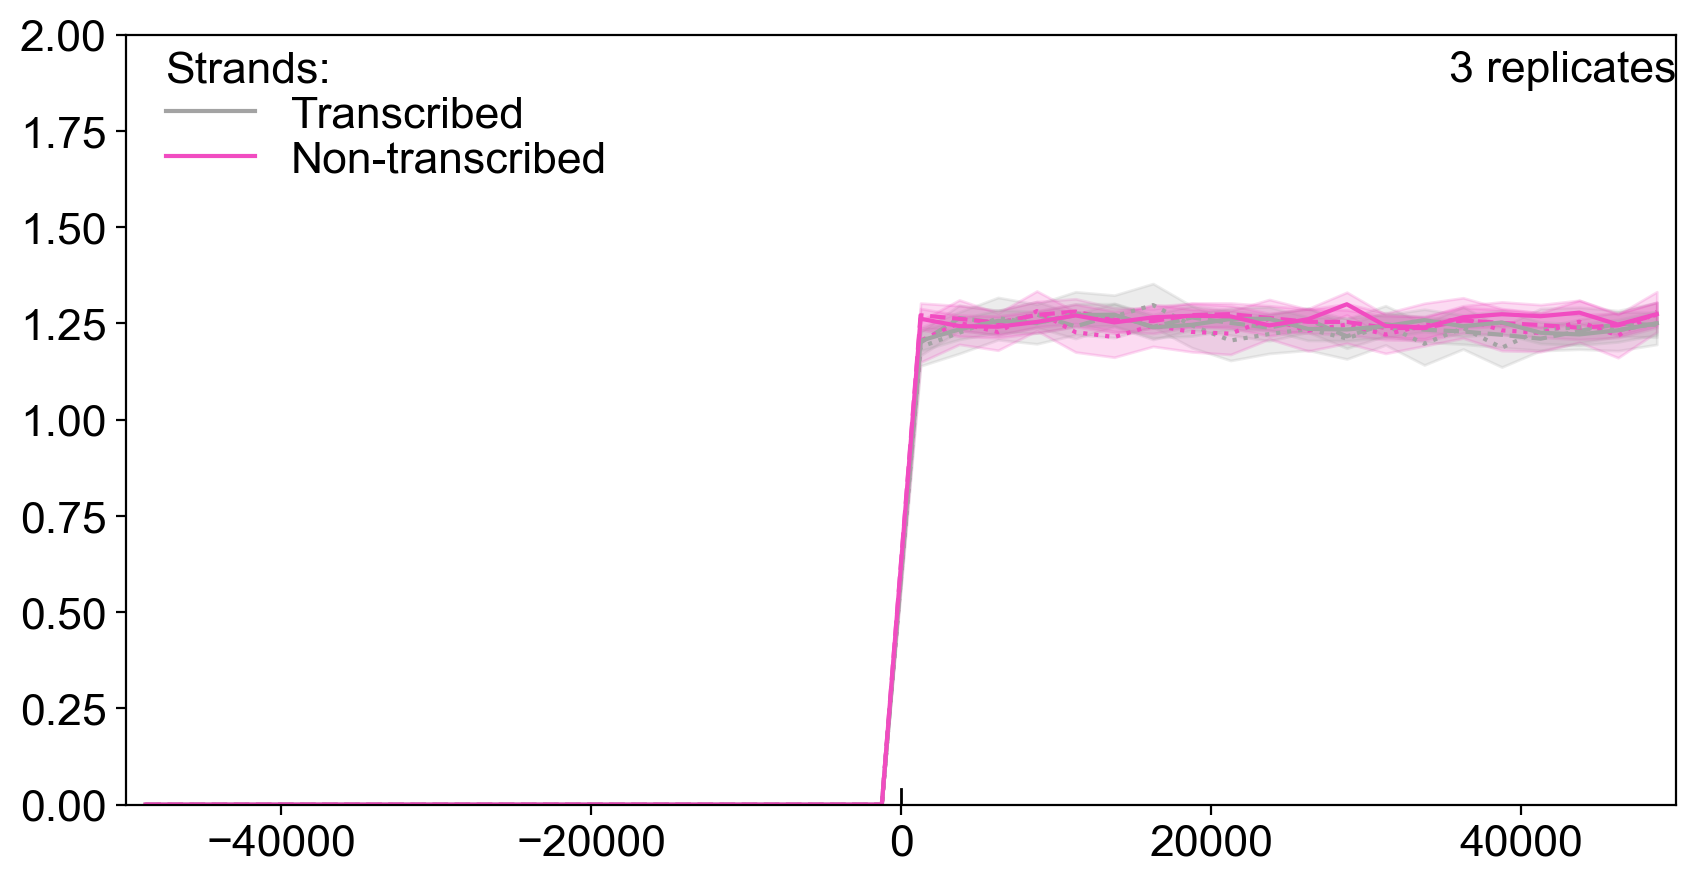

In [38]:
sample_groups = {"LN-229 WT" : ['WT_1mM_3x_rep1', 'WT_1mM_3x_rep2', 'WT_1mM_3x_rep3'],
                 "LN-229 +MGMT" : ['MGMT_1mM_3x_rep1', 'MGMT_1mM_3x_rep2', 'MGMT_1mM_3x_rep3']}

DATA1 = TES_data.copy()

xlims = (-50000, 50000)
ylims = (0, 2)
ylabel = r'$\mathit{O}^6$-meG counts per $10^3$ G'
marks = [-50000, 0, 50000]
#mark_labels = ["-50 Kb", "TSS", "50% gene", "TES", "+50 Kb"]
yticks = [0, 1, 2]
SD_df = pd.read_csv(data_path + "sample_averages_medians_prot_coding_genes.csv", index_col =0)

binsizes = ["2.5 Kb", "5% (~2.2 Kb)", "2.5 Kb"]
title = "30% most expressed genes"
OUTNAME = 'TES_plot_'

plot_metaprofile_gene_and_beyond_SAMPLE_GROUPS(DATA1, sample_groups, xlims, ylims, ylabel, marks, mark_labels,
                                                   SD_df, binsizes, yticks, title, OUTNAME)

In [115]:
def plot_metaprofile_gene_and_beyond_SAMPLE_GROUPS(DATA1, sample_groups, xlims, ylims, ylabel, marks, mark_labels,
                                                   SD_df, binsizes, yticks, title, OUTNAME):
    
    hue_palette = {"Non-transcribed" : sns.color_palette("bright")[6],
                   "Transcribed" : sns.color_palette("bright")[7]}
        
    for sg in sample_groups:
        fig = plt.figure(1, (2*5, 1*5), dpi = 200)
        ax = plt.subplot(1, 1, 1)
        
        samples = sample_groups[sg]
        
        tmp = SD_df[SD_df["Sample"].isin(samples)].sort_values(by = "Sample").copy()
        if tmp.shape[0] > 3:
            print("Warning")
        tmp.loc[:, "Rank"] = scipy.stats.rankdata(1.0/tmp["G_norm_damage_average"], method = "ordinal") - 1 
        print(tmp)
        linestyles = ["solid", "dashed", "dotted"]
        
        for index, s in enumerate(samples):
            df = DATA1[DATA1["Sample"] == s].copy()
            df = df.sort_values(by = "plot_bin", ascending = True).reset_index(drop = True)
            
            linestyle = linestyles[tmp[tmp["Sample"] == s]["Rank"].iat[0]]
            
            legend  = False
            if linestyle == "solid":
                legend = "full"

            sns.lineplot(x = "plot_bin", y = "Value", hue = "Feature", data = df,
                            hue_order = ["Transcribed", "Non-transcribed"], estimator=np.mean, errorbar=('ci', 95),
                            palette = hue_palette, linestyle = linestyle, legend = legend)

        leg = ax.legend(loc = 2, frameon = False, title = "Strands:", labelspacing = 0.1, bbox_to_anchor=(0, 0.05, 0.5, 0.98))
        leg._legend_box.align='left'
        #ax.text(0.5, 1, title, ha = "center", va = "top", transform=ax.transAxes)
        
        N = len(samples)
        ax.text(1, 0.98, str(N) + " replicates", ha = "right", va = "top", transform=ax.transAxes)
        ax.set_ylabel(ylabel)
        ax.set_xlabel("")
        ax.set_ylim(ylims[0], ylims[1])
        ax.set_xlim(xlims[0], xlims[1])
        #ax.axvline(marks[1], ymax = 2, ls = "-", color = "black", lw = 1, zorder = -2)
        #ax.axvline(marks[3], ymax = 2, ls = "-", color = "black", lw = 1, zorder = -2)

        ax.set_xticks(marks)
        ax.set_xticklabels(mark_labels)
        #ax.set_yticks(yticks)
        
        ax.text(0.5*(marks[0]+marks[1]), 0.005*(ylims[1] - ylims[0]) + ylims[0], binsizes[0], 
                    ha = "center", va = "bottom", color = "gray")
        ax.text(0.5*(marks[1]+marks[3]), 0.005*(ylims[1] - ylims[0]) + ylims[0], binsizes[1], 
                    ha = "center", va = "bottom", color = "gray")
        ax.text(0.5*(marks[3]+marks[4]), 0.005*(ylims[1] - ylims[0]) + ylims[0], binsizes[2], 
                    ha = "center", va = "bottom", color = "gray")

        ax.text(marks[0] + 0.4*(marks[1] - marks[0]), 0.06*(ylims[1] - ylims[0]) + ylims[0], "Bins:", 
                    ha = "center", va = "bottom", color = "gray")
        
        
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        #fig.supylabel(t = ylabel, ha = "center", va = "top",
         #                 x = 0.04, y = 0.98, fontsize = "medium")
        
        plt.tight_layout(pad = 0.25)
        plt.savefig(graph_path + 'Figure4/' +OUTNAME+ sg.replace(" ", "_") + "_metaprofile_" + title.replace(" ", "_").replace("%", "pc") + ".png")
        plt.close(fig)


In [116]:
sample_groups = {"LN-229 WT" : ['WT_1mM_3x_rep1', 'WT_1mM_3x_rep2', 'WT_1mM_3x_rep3'],
                 "LN-229 +MGMT" : ['MGMT_1mM_3x_rep1', 'MGMT_1mM_3x_rep2', 'MGMT_1mM_3x_rep3']}

DATA1 = plot_df.copy()

xlims = (-50000, gene_width+50000)
ylims = (0.8, 1.8)
ylabel = r'$\mathit{O}^6$-meG counts per $10^3$ G'
marks = [-50000, 0, gene_width/2.0, gene_width, gene_width + 50000]
mark_labels = ["-50 Kb", "TSS", "", "TES", "+50 Kb"]
SD_df = pd.read_csv(data_path + "sample_averages_medians_prot_coding_genes.csv", index_col =0)

binsizes = ["2.5 Kb", "5% (~2.2 Kb)", "2.5 Kb"]
title = "30% most expressed genes"
OUTNAME = 'gene_beyond_plot_'

plot_metaprofile_gene_and_beyond_SAMPLE_GROUPS(DATA1, sample_groups, xlims, ylims, ylabel, marks, mark_labels,
                                                   SD_df, binsizes, yticks, title, OUTNAME)

            Sample  damage_average  damage_median  \
0   WT_1mM_3x_rep1       18.523695            5.0   
12  WT_1mM_3x_rep2        5.987550            1.0   
24  WT_1mM_3x_rep3       26.983133            7.0   

    gene_lenght_norm_damage_average  gene_lenght_norm_damage_median  \
0                          0.606154                        0.551614   
12                         0.192028                        0.140275   
24                         0.826198                        0.777438   

    G_norm_damage_average  G_norm_damage_median  Rank  
0                2.534247              2.456571     1  
12               0.807587              0.645370     2  
24               3.516123              3.461911     0  
              Sample  damage_average  damage_median  \
1   MGMT_1mM_3x_rep1        5.266667            1.0   
13  MGMT_1mM_3x_rep2        4.926506            1.0   
25  MGMT_1mM_3x_rep3       13.573494            4.0   

    gene_lenght_norm_damage_average  gene_lenght_norm_dam

In [72]:
plot_df.to_csv(data_path + 'metaprofile_plot_data.csv')

## Normalize by nDNA

In [74]:
data = plot_df.copy()
data['Sample'].unique()

array(['MGMT_1mM_3x_rep1', 'MGMT_1mM_3x_rep2', 'MGMT_1mM_3x_rep3',
       'MGMT_1mMnaked_1x_rep1', 'MGMT_1mMnaked_1x_rep2',
       'MGMT_1mMnaked_1x_rep3', 'WT_1mM_3x_rep1', 'WT_1mM_3x_rep2',
       'WT_1mM_3x_rep3', 'WT_1mMnaked_1x_rep1', 'WT_1mMnaked_1x_rep2',
       'WT_1mMnaked_1x_rep3'], dtype=object)

In [76]:
nDNA_data = data[data.Sample.isin(['MGMT_1mMnaked_1x_rep1', 'MGMT_1mMnaked_1x_rep2', 'MGMT_1mMnaked_1x_rep3',
                                  'WT_1mMnaked_1x_rep1', 'WT_1mMnaked_1x_rep2', 'WT_1mMnaked_1x_rep3'])]
nDNA_data

Sample             Gene     Strand      Bin     Value  \
993360   MGMT_1mMnaked_1x_rep1  ENSG00000000419  antisense -48750.0  0.676677   
993361   MGMT_1mMnaked_1x_rep1  ENSG00000000419  antisense -46250.0  2.543310   
993362   MGMT_1mMnaked_1x_rep1  ENSG00000000419  antisense -43750.0  1.607109   
993363   MGMT_1mMnaked_1x_rep1  ENSG00000000419  antisense -41250.0  1.999191   
993364   MGMT_1mMnaked_1x_rep1  ENSG00000000419  antisense -38750.0  0.581668   
...                        ...              ...        ...      ...       ...   
3973435    WT_1mMnaked_1x_rep3  ENSG00000284770      sense  38750.0  2.437960   
3973436    WT_1mMnaked_1x_rep3  ENSG00000284770      sense  41250.0  0.000000   
3973437    WT_1mMnaked_1x_rep3  ENSG00000284770      sense  43750.0  1.229488   
3973438    WT_1mMnaked_1x_rep3  ENSG00000284770      sense  46250.0  0.824993   
3973439    WT_1mMnaked_1x_rep3  ENSG00000284770      sense  48750.0  0.763698   

         G_count          Feature  plot_bin  
993360     551.0      Transcribed  -48750.0  
993361     733.0      Transcribed  -46250.0  
993362     696.0      Transcribed  -43750.0  
993363     746.0      Transcribed  -41250.0  
993364     641.0      Transcribed  -38750.0  
...          ...              ...       ...  
3973435    390.0  Non-transcribed  138750.0  
3973436    553.0  Non-transcribed  141250.0  
3973437    464.0  Non-transcribed  143750.0  
3973438    461.0  Non-transcribed  146250.0  
3973439    498.0  Non-transcribed  148750.0  

[2980080 rows x 8 columns]

In [77]:
cell_data = data[data.Sample.isin(['MGMT_1mM_3x_rep1', 'MGMT_1mM_3x_rep2', 'MGMT_1mM_3x_rep3',
                                   'WT_1mM_3x_rep1', 'WT_1mM_3x_rep2', 'WT_1mM_3x_rep3'])]
cell_data

Sample             Gene     Strand      Bin     Value  \
0        MGMT_1mM_3x_rep1  ENSG00000000419  antisense -48750.0  2.520714   
1        MGMT_1mM_3x_rep1  ENSG00000000419  antisense -46250.0  3.789668   
2        MGMT_1mM_3x_rep1  ENSG00000000419  antisense -43750.0  3.991130   
3        MGMT_1mM_3x_rep1  ENSG00000000419  antisense -41250.0  3.723628   
4        MGMT_1mM_3x_rep1  ENSG00000000419  antisense -38750.0  0.000000   
...                   ...              ...        ...      ...       ...   
2980075    WT_1mM_3x_rep3  ENSG00000284770      sense  38750.0  1.458483   
2980076    WT_1mM_3x_rep3  ENSG00000284770      sense  41250.0  0.514293   
2980077    WT_1mM_3x_rep3  ENSG00000284770      sense  43750.0  1.225880   
2980078    WT_1mM_3x_rep3  ENSG00000284770      sense  46250.0  2.467715   
2980079    WT_1mM_3x_rep3  ENSG00000284770      sense  48750.0  1.713278   

         G_count          Feature  plot_bin  
0          551.0      Transcribed  -48750.0  
1          733.0      Transcribed  -46250.0  
2          696.0      Transcribed  -43750.0  
3          746.0      Transcribed  -41250.0  
4          641.0      Transcribed  -38750.0  
...          ...              ...       ...  
2980075    390.0  Non-transcribed  138750.0  
2980076    553.0  Non-transcribed  141250.0  
2980077    464.0  Non-transcribed  143750.0  
2980078    461.0  Non-transcribed  146250.0  
2980079    498.0  Non-transcribed  148750.0  

[2980080 rows x 8 columns]

In [78]:
columns_to_check = ['Value']
df_to_check = nDNA_data

for column_to_check in columns_to_check:
    print(f"Number of rows with positive value: {len(df_to_check[df_to_check[column_to_check] > 0])}")
    print(f"Number of rows with value zero: {len(df_to_check[df_to_check[column_to_check] == 0])}")
    print(f"Number of rows with negative value: {len(df_to_check[df_to_check[column_to_check] < 0])}")

Number of rows with positive value: 1754076
Number of rows with value zero: 1225332
Number of rows with negative value: 0


In [83]:
WT_nDNA = nDNA_data[nDNA_data["Sample"].isin(['WT_1mMnaked_1x_rep1', 'WT_1mMnaked_1x_rep2','WT_1mMnaked_1x_rep3'])].copy()
WT_nDNA = WT_nDNA.drop(columns={'Sample', 'Strand'})
WT_nDNA = WT_nDNA.groupby(by=['Gene', 'Feature', 'Bin', 'plot_bin']).mean().reset_index()
WT_nDNA

Gene          Feature      Bin  plot_bin     Value  G_count
0       ENSG00000000419  Non-transcribed -48750.0  -48750.0  1.084547    612.0
1       ENSG00000000419  Non-transcribed -46250.0  -46250.0  2.196925    718.0
2       ENSG00000000419  Non-transcribed -43750.0  -43750.0  1.519401    562.0
3       ENSG00000000419  Non-transcribed -41250.0  -41250.0  6.011224    561.0
4       ENSG00000000419  Non-transcribed -38750.0  -38750.0  0.964037    557.0
...                 ...              ...      ...       ...       ...      ...
496675  ENSG00000284770      Transcribed  38750.0  138750.0  3.100677    569.0
496676  ENSG00000284770      Transcribed  41250.0  141250.0  3.690239    470.0
496677  ENSG00000284770      Transcribed  43750.0  143750.0  0.944061    470.0
496678  ENSG00000284770      Transcribed  46250.0  146250.0  3.328304    455.0
496679  ENSG00000284770      Transcribed  48750.0  148750.0  3.860085    547.0

[496680 rows x 6 columns]

In [84]:
zero_WT_nDNA = WT_nDNA[WT_nDNA["Value"] == 0].copy()
zero_WT_nDNA

Gene          Feature        Bin  plot_bin  Value  G_count
81      ENSG00000000419      Transcribed      0.075    7500.0    0.0    227.0
83      ENSG00000000419      Transcribed      0.175   17500.0    0.0    187.0
365     ENSG00000001497  Non-transcribed -36250.000  -36250.0    0.0    582.0
382     ENSG00000001497  Non-transcribed      0.125   12500.0    0.0    291.0
384     ENSG00000001497  Non-transcribed      0.225   22500.0    0.0    298.0
...                 ...              ...        ...       ...    ...      ...
496518  ENSG00000283154      Transcribed  -3750.000   -3750.0    0.0    466.0
496544  ENSG00000283154      Transcribed  11250.000  111250.0    0.0    452.0
496547  ENSG00000283154      Transcribed  18750.000  118750.0    0.0    533.0
496625  ENSG00000284770      Transcribed -36250.000  -36250.0    0.0    434.0
496635  ENSG00000284770      Transcribed -11250.000  -11250.0    0.0    491.0

[52923 rows x 6 columns]

In [85]:
MGMT_nDNA = nDNA_data[nDNA_data["Sample"].isin(['MGMT_1mMnaked_1x_rep1', 'MGMT_1mMnaked_1x_rep2','MGMT_1mMnaked_1x_rep3'])].copy()
MGMT_nDNA = MGMT_nDNA.drop(columns={'Sample', 'Strand'})
MGMT_nDNA = MGMT_nDNA.groupby(by=['Gene', 'Feature', 'Bin', 'plot_bin']).mean().reset_index()
MGMT_nDNA

Gene          Feature      Bin  plot_bin     Value  G_count
0       ENSG00000000419  Non-transcribed -48750.0  -48750.0  0.847892    612.0
1       ENSG00000000419  Non-transcribed -46250.0  -46250.0  1.534893    718.0
2       ENSG00000000419  Non-transcribed -43750.0  -43750.0  1.960948    562.0
3       ENSG00000000419  Non-transcribed -41250.0  -41250.0  3.646443    561.0
4       ENSG00000000419  Non-transcribed -38750.0  -38750.0  0.485357    557.0
...                 ...              ...      ...       ...       ...      ...
496675  ENSG00000284770      Transcribed  38750.0  138750.0  2.452858    569.0
496676  ENSG00000284770      Transcribed  41250.0  141250.0  6.857082    470.0
496677  ENSG00000284770      Transcribed  43750.0  143750.0  2.728260    470.0
496678  ENSG00000284770      Transcribed  46250.0  146250.0  0.594163    455.0
496679  ENSG00000284770      Transcribed  48750.0  148750.0  2.489046    547.0

[496680 rows x 6 columns]

In [86]:
zero_MGMT_nDNA = MGMT_nDNA[MGMT_nDNA["Value"] == 0].copy()
zero_MGMT_nDNA

Gene          Feature        Bin  plot_bin  Value  G_count
83      ENSG00000000419      Transcribed      0.175   17500.0    0.0    187.0
99      ENSG00000000419      Transcribed      0.975   97500.0    0.0    182.0
363     ENSG00000001497  Non-transcribed -41250.000  -41250.0    0.0    585.0
454     ENSG00000001497      Transcribed      0.725   72500.0    0.0    293.0
463     ENSG00000001497      Transcribed   8750.000  108750.0    0.0    511.0
...                 ...              ...        ...       ...    ...      ...
496414  ENSG00000278615      Transcribed      0.725   72500.0    0.0     36.0
496415  ENSG00000278615      Transcribed      0.775   77500.0    0.0     31.0
496416  ENSG00000278615      Transcribed      0.825   82500.0    0.0     24.0
496417  ENSG00000278615      Transcribed      0.875   87500.0    0.0     31.0
496453  ENSG00000283154  Non-transcribed -16250.000  -16250.0    0.0    521.0

[31971 rows x 6 columns]

In [99]:
sample_groups = [['WT_1mM_3x_rep1', 'WT_1mM_3x_rep2', 'WT_1mM_3x_rep3'],
                 ['MGMT_1mM_3x_rep1', 'MGMT_1mM_3x_rep2', 'MGMT_1mM_3x_rep3']]

DFs_nDNA = [WT_nDNA, MGMT_nDNA]

DATA_nDNA_corrected = pd.DataFrame({})

for index, DF_nDNA in enumerate(DFs_nDNA):
    tmp = cell_data[cell_data["Sample"].isin(sample_groups[index])].copy()
    tmp = pd.merge(tmp, DF_nDNA, on = ("Gene", "Bin", "plot_bin", "G_count", "Feature"), how = "left")
    #tmp = pd.merge(tmp, zero_bins_df, on = ("Gene", "Bin", "Feature"), how='outer', indicator=True)
    #tmp = tmp[tmp["_merge"] == "left_only"].copy()
    
    print(tmp.shape[0] - tmp.dropna().shape[0])
    #tmp.loc[:, "Value_y"] = tmp["Value_y"].replace(0, np.nan)
    #print(tmp.shape[0] - tmp.dropna().shape[0])
    tmp = tmp.dropna()
    print(tmp.shape[0] - tmp.dropna().shape[0])
    
    tmp.loc[:, "Value"] = tmp["Value_x"] - tmp["Value_y"]
    
    if tmp[tmp["Value"] == np.inf].shape[0] > 0:
        print("Warning: Infs!")
    if tmp[tmp["Value"] == -1*np.inf].shape[0] > 0:
        print("Warning: Infs!")
        
    print(tmp.shape[0])
    
    DATA_nDNA_corrected = pd.concat([DATA_nDNA_corrected, tmp])
    
DATA_nDNA_corrected = DATA_nDNA_corrected.reset_index(drop = True)
DATA_nDNA_corrected

336
0
1489704
336
0
1489704


Sample             Gene     Strand      Bin   Value_x  \
0          WT_1mM_3x_rep1  ENSG00000000419  antisense -48750.0  0.716142   
1          WT_1mM_3x_rep1  ENSG00000000419  antisense -46250.0  1.614984   
2          WT_1mM_3x_rep1  ENSG00000000419  antisense -43750.0  3.968623   
3          WT_1mM_3x_rep1  ENSG00000000419  antisense -41250.0  5.289470   
4          WT_1mM_3x_rep1  ENSG00000000419  antisense -38750.0  3.693552   
...                   ...              ...        ...      ...       ...   
2979403  MGMT_1mM_3x_rep3  ENSG00000284770      sense  38750.0  2.807818   
2979404  MGMT_1mM_3x_rep3  ENSG00000284770      sense  41250.0  0.990099   
2979405  MGMT_1mM_3x_rep3  ENSG00000284770      sense  43750.0  1.180010   
2979406  MGMT_1mM_3x_rep3  ENSG00000284770      sense  46250.0  0.000000   
2979407  MGMT_1mM_3x_rep3  ENSG00000284770      sense  48750.0  3.298341   

         G_count          Feature  plot_bin   Value_y     Value  
0          551.0      Transcribed  -48750.0  0.805279 -0.089137  
1          733.0      Transcribed  -46250.0  1.465126  0.149858  
2          696.0      Transcribed  -43750.0  1.902075  2.066548  
3          746.0      Transcribed  -41250.0  2.369874  2.919596  
4          641.0      Transcribed  -38750.0  3.293436  0.400116  
...          ...              ...       ...       ...       ...  
2979403    390.0  Non-transcribed  138750.0  1.011864  1.795954  
2979404    553.0  Non-transcribed  141250.0  1.019833 -0.029734  
2979405    464.0  Non-transcribed  143750.0  0.924128  0.255882  
2979406    461.0  Non-transcribed  146250.0  1.836664 -1.836664  
2979407    498.0  Non-transcribed  148750.0  1.894782  1.403559  

[2979408 rows x 10 columns]

In [100]:
dfs_to_check = [DATA_nDNA_corrected]
columns_to_check = ['Value']

for df_to_check in dfs_to_check:
    for column_to_check in columns_to_check:
        print(f"Number of rows: {len(df_to_check[column_to_check])}")
        print(f"Number of rows with NaN: {len(df_to_check[df_to_check[column_to_check].isna()])}")
        print(f"Number of rows with value inf: {len(df_to_check[df_to_check[column_to_check] == np.inf])}")
        print(f"Number of rows with positive value: {len(df_to_check[df_to_check[column_to_check] > 0])}")
        print(f"Number of rows with value zero: {len(df_to_check[df_to_check[column_to_check] == 0])}")
        print(f"Number of rows with negative value: {len(df_to_check[df_to_check[column_to_check] < 0])}")

Number of rows: 2979408
Number of rows with NaN: 0
Number of rows with value inf: 0
Number of rows with positive value: 1133759
Number of rows with value zero: 204329
Number of rows with negative value: 1641320


In [101]:
DATA_nDNA_corrected.to_csv(data_path + 'Gene_profiles_nDNA_corrected_240823.csv')

### Plotting 

In [110]:
def plot_nDNA_norm_metaprofile_gene_and_beyond_SAMPLE_GROUPS(DATA1, sample_groups, xlims, ylims, ylabel, marks, mark_labels,
                                                   SD_df, binsizes, yticks, title, OUTNAME):
    
    hue_palette = {"Non-transcribed" : sns.color_palette("bright")[6],
                   "Transcribed" : sns.color_palette("bright")[7]}
        
    for sg in sample_groups:
        fig = plt.figure(1, (2*5, 1*5), dpi = 200)
        ax = plt.subplot(1, 1, 1)
        
        samples = sample_groups[sg]
        
        tmp = SD_df[SD_df["Sample"].isin(samples)].sort_values(by = "Sample").copy()
        if tmp.shape[0] > 3:
            print("Warning")
        tmp.loc[:, "Rank"] = scipy.stats.rankdata(1.0/tmp["G_norm_damage_average"], method = "ordinal") - 1 
        print(tmp)
        linestyles = ["solid", "dashed", "dotted"]
        
        for index, s in enumerate(samples):
            df = DATA1[DATA1["Sample"] == s].copy()
            df = df.sort_values(by = "plot_bin", ascending = True).reset_index(drop = True)
            
            linestyle = linestyles[tmp[tmp["Sample"] == s]["Rank"].iat[0]]
            
            legend  = False
            if linestyle == "solid":
                legend = "full"

            sns.lineplot(x = "plot_bin", y = "Value", hue = "Feature", data = df,
                            hue_order = ["Transcribed", "Non-transcribed"], estimator=np.mean, errorbar=('ci', 95),
                            palette = hue_palette, linestyle = linestyle, legend = legend)

        leg = ax.legend(loc = 2, frameon = False, title = "Strands:", labelspacing = 0.1, bbox_to_anchor=(0, 0.05, 0.5, 0.98))
        leg._legend_box.align='left'
        #ax.text(0.5, 1, title, ha = "center", va = "top", transform=ax.transAxes)
        
        N = len(samples)
        ax.text(1, 0.98, str(N) + " replicates", ha = "right", va = "top", transform=ax.transAxes)
        ax.set_ylabel(ylabel)
        ax.set_xlabel("")
        ax.set_ylim(ylims[0], ylims[1])
        ax.set_xlim(xlims[0], xlims[1])
        #ax.axvline(marks[1], ymax = 0.02, ls = "-", color = "black", lw = 1, zorder = -2)
        #ax.axvline(marks[3], ymax = 0.02, ls = "-", color = "black", lw = 1, zorder = -2)

        ax.set_xticks(marks)
        ax.set_xticklabels(mark_labels)
        ax.set_yticks(yticks)
        
        ax.text(0.5*(marks[0]+marks[1]), 0.005*(ylims[1] - ylims[0]) + ylims[0], binsizes[0], 
                    ha = "center", va = "bottom", color = "gray")
        ax.text(0.5*(marks[1]+marks[3]), 0.005*(ylims[1] - ylims[0]) + ylims[0], binsizes[1], 
                    ha = "center", va = "bottom", color = "gray")
        ax.text(0.5*(marks[3]+marks[4]), 0.005*(ylims[1] - ylims[0]) + ylims[0], binsizes[2], 
                    ha = "center", va = "bottom", color = "gray")

        ax.text(marks[0] + 0.4*(marks[1] - marks[0]), 0.06*(ylims[1] - ylims[0]) + ylims[0], "Bins:", 
                    ha = "center", va = "bottom", color = "gray")
        
        
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
        #fig.supylabel(t = ylabel, ha = "center", va = "top",
                         # x = 0.04, y = 0.98, fontsize = "medium")
        
        plt.tight_layout(pad = 0.25)
        plt.savefig(graph_path + 'Figure4/' +OUTNAME+ sg.replace(" ", "_") + "_metaprofile_nDNA_norm_" + title.replace(" ", "_").replace("%", "pc") + ".png")
        plt.close(fig)


In [117]:
sample_groups = {"LN-229 WT" : ['WT_1mM_3x_rep1', 'WT_1mM_3x_rep2', 'WT_1mM_3x_rep3'],
                 "LN-229 +MGMT" : ['MGMT_1mM_3x_rep1', 'MGMT_1mM_3x_rep2', 'MGMT_1mM_3x_rep3']}

DATA1 = DATA_nDNA_corrected.copy()

xlims = (-50000, gene_width + 50000)
ylims = (-0.4, 0.4)
ylabel =  r'Difference in $\mathit{O}^6$-meG counts'+'\n between cells and naked DNA'
marks = [-50000, 0, gene_width/2.0, gene_width, gene_width + 50000]
mark_labels = ["-50 Kb", "TSS", "", "TES", "+50 Kb"]
yticks = [-0.2, 0, 0.2]
SD_df = pd.read_csv(data_path + "sample_averages_medians_prot_coding_genes.csv", index_col =0)

binsizes = ["2.5 Kb", "5% (~2.2 Kb)", "2.5 Kb"]
title = "30% most expressed genes"
OUTNAME = 'gene_beyond_nDNA_norm_'

plot_nDNA_norm_metaprofile_gene_and_beyond_SAMPLE_GROUPS(DATA1, sample_groups, xlims, ylims, ylabel, marks, mark_labels,
                                                   SD_df, binsizes, yticks, title, OUTNAME)

            Sample  damage_average  damage_median  \
0   WT_1mM_3x_rep1       18.523695            5.0   
12  WT_1mM_3x_rep2        5.987550            1.0   
24  WT_1mM_3x_rep3       26.983133            7.0   

    gene_lenght_norm_damage_average  gene_lenght_norm_damage_median  \
0                          0.606154                        0.551614   
12                         0.192028                        0.140275   
24                         0.826198                        0.777438   

    G_norm_damage_average  G_norm_damage_median  Rank  
0                2.534247              2.456571     1  
12               0.807587              0.645370     2  
24               3.516123              3.461911     0  
              Sample  damage_average  damage_median  \
1   MGMT_1mM_3x_rep1        5.266667            1.0   
13  MGMT_1mM_3x_rep2        4.926506            1.0   
25  MGMT_1mM_3x_rep3       13.573494            4.0   

    gene_lenght_norm_damage_average  gene_lenght_norm_dam